# Análise exploratória dos dados coletados do Mercado Livre


[Github com arquivos dos dados](https://github.com/cassiasamp/calculadora-de-imoveis-mar-21)



In [2]:
import pandas as pd

In [1]:
url = "https://raw.githubusercontent.com/cassiasamp/calculadora-de-imoveis-mar-21/main/manipulacao-de-dados/dados_tratados_ml.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,aluguel,zona,area,quarto
0,1000.0,sul,48.0,2.0
1,1200.0,sul,67.0,3.0
2,1300.0,sul,65.0,2.0
3,1280.0,sul,65.0,2.0
4,1100.0,sul,50.0,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   aluguel  1152 non-null   float64
 1   zona     1152 non-null   object 
 2   area     1152 non-null   float64
 3   quarto   1152 non-null   float64
dtypes: float64(3), object(1)
memory usage: 36.1+ KB


In [8]:
df.describe().T # describe da estatística descritiva

,count,mean,std,min,25%,50%,75%,max
aluguel,1152.0,2497.282986,1743.603188,500.0,1471.0,2000.0,2900.0,15000.0
area,1152.0,77.013889,61.441147,12.0,46.0,60.0,85.0,800.0
quarto,1152.0,1.984375,0.808146,1.0,1.0,2.0,2.0,5.0


In [9]:
import matplotlib.pyplot as plt

In [12]:
df[['aluguel', 'quarto']]

,aluguel,quarto
0,1000.0,2.0
1,1200.0,3.0
2,1300.0,2.0
3,1280.0,2.0
4,1100.0,2.0
...,...,...
1147,3000.0,1.0
1148,1700.0,4.0
1149,1800.0,1.0
1150,3400.0,3.0


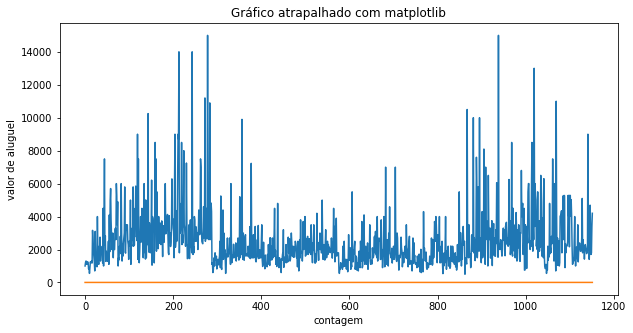

In [27]:
plt.figure(figsize=(10, 5)) # largura, altura
plt.plot(df[['aluguel', 'quarto']])
plt.ylabel('valor de aluguel')
plt.xlabel('contagem')
plt.title('Gráfico atrapalhado com matplotlib');

In [23]:
df['quarto'].values

array([2., 3., 2., ..., 1., 3., 3.])

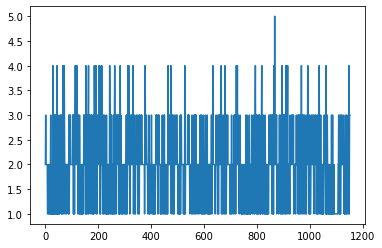

In [24]:
plt.plot(df['quarto'].values);

In [28]:
import seaborn as sns


Primeira hipótese: será que os aluguéis vão aumentando de acordo com o número de quartos?

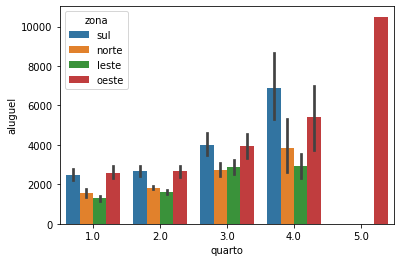

In [34]:
sns.barplot(x='quarto', y='aluguel', data=df, hue='zona');

Nos dados que coletamos essa hipótese se mantém e também podemos ver que os aluguéis são mais caros na zona sul e, em seguida, na zona oeste.

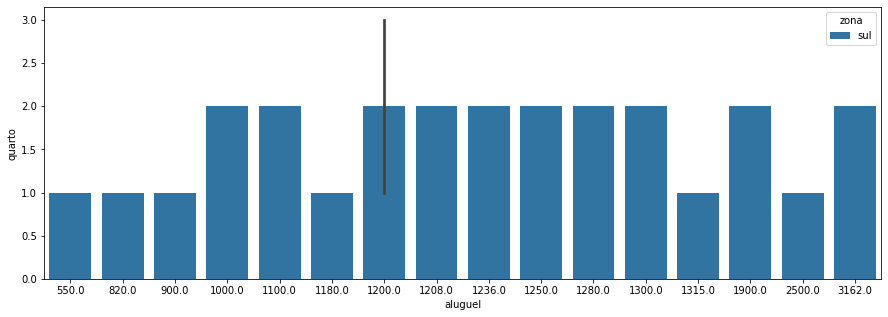

In [42]:
plt.figure(figsize=(15, 5))
sns.barplot(y='quarto', x='aluguel', data=df[:20], hue='zona');

In [43]:
# Qual gráfico podemos usar para ver como os nossos dados estão distribuídos?
# histograma

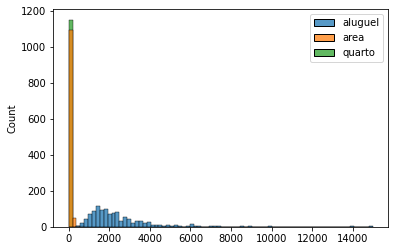

In [45]:
sns.histplot(data=df);

Percebemos que as distribuições e area e aluguel são assimétricas e enviesadas à direita (tem a cauda para a direita), por isso, elas são consideradas Log Normais.

E se fizermos uma transformação logaritmica nesses dados, tornamos essas distribuição mais próxima da distribuição normal.

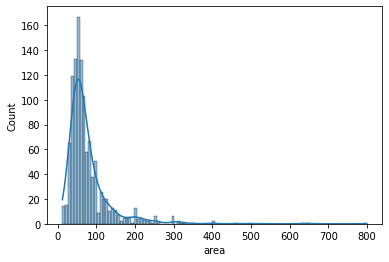

In [56]:
sns.histplot(data=df, x='area', kde=True);

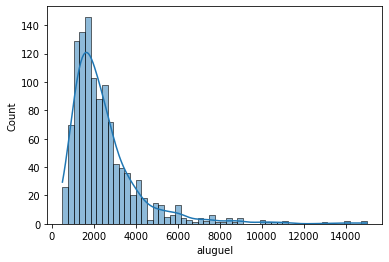

In [54]:
sns.histplot(data=df, x='aluguel', kde=True);

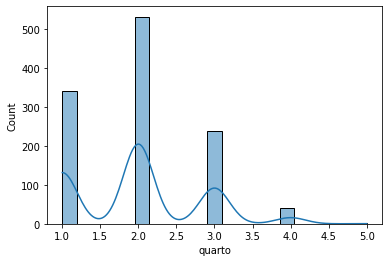

In [55]:
sns.histplot(data=df, x='quarto', kde=True);

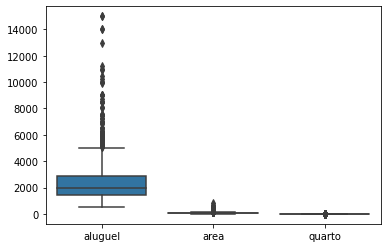

In [58]:
sns.boxplot(data=df);

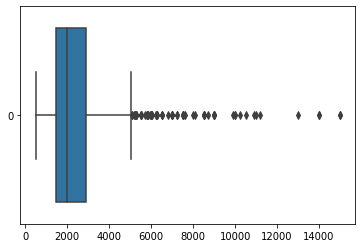

In [61]:
sns.boxplot(data=df['aluguel'], orient='h');

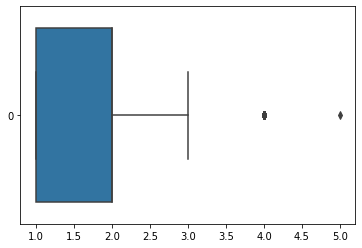

In [62]:
sns.boxplot(data=df['quarto'], orient='h');

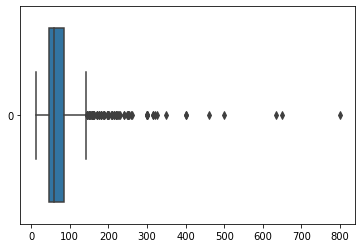

In [63]:
sns.boxplot(data=df['area'], orient='h');

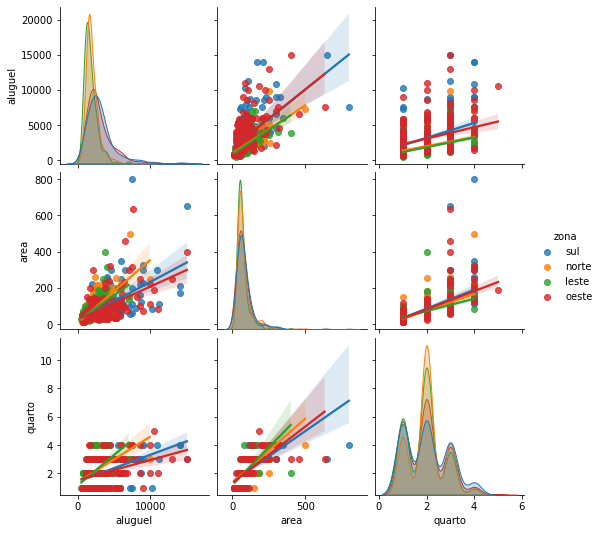

In [78]:
sns.pairplot(data=df, hue='zona', kind='reg');

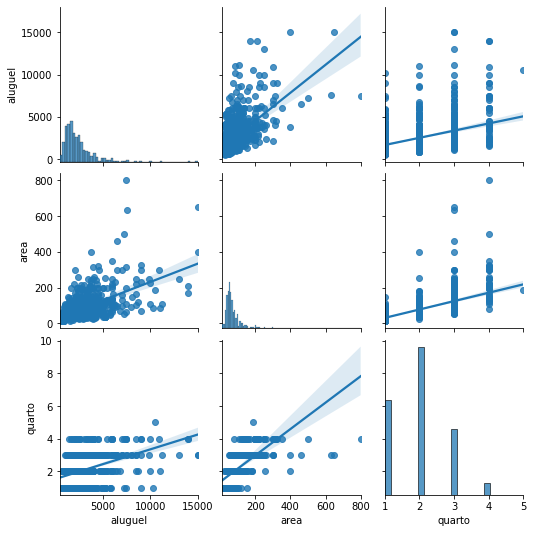

In [79]:
sns.pairplot(data=df, kind='reg');

Há diversos tipos de correlação, dependendo da distribuição dos dados, algumas se encaixam melhor para o cálculo.

In [72]:
correlacao_p = df.corr() # correlação de Pearson

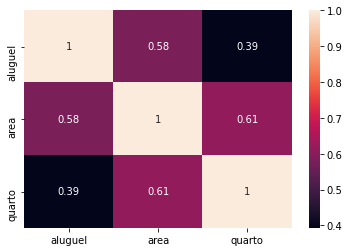

In [73]:
sns.heatmap(correlacao_p, annot=True);

In [74]:
correlacao_s = df.corr(method='spearman')

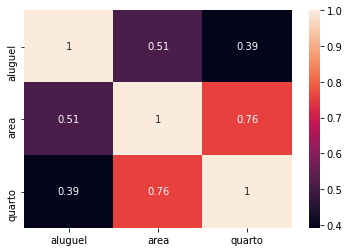

In [75]:
sns.heatmap(correlacao_s, annot=True);